# Recommendation System


In [ ]:
import yfinance as yf
import pandas as pd

# List of Indian stock tickers (removed duplicate 'BAJJAUTO.NS')
stocks = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "SBIN.NS", "BAJFINANCE.NS",
    "ITC.NS", "KOTAKBANK.NS", "TITAN.NS", "LT.NS", "AXISBANK.NS", "MARUTI.NS", "WIPRO.NS",
    "BHARTIARTL.NS", "SUNPHARMA.NS", "DRREDDY.NS", "ONGC.NS", "M&M.NS", "ASIANPAINT.NS",
    "NESTLEIND.NS", "INDUSINDBK.NS", "TATAMOTORS.NS", "ULTRACEMCO.NS", "POWERGRID.NS", "NTPC.NS",
    "TECHM.NS", "HCLTECH.NS", "SHREECEM.NS", "BAJAJFINSV.NS", "ADANIGREEN.NS", "GAIL.NS",
    "COLPAL.NS", "HINDALCO.NS", "SBILIFE.NS", "GRASIM.NS", "MARICO.NS", "APOLLOHOSP.NS",
    "DIVISLAB.NS", "TATAPOWER.NS", "JSWSTEEL.NS", "VEDL.NS", "INDIGO.NS", "LUPIN.NS",
    "BANKBARODA.NS", "CIPLA.NS", "BOSCHLTD.NS", "BHEL.NS", "SIEMENS.NS", "LALPATHLAB.NS",
    "IOC.NS", "TATACONSUM.NS", "UPL.NS", "TATACHEM.NS", "BERGEPAINT.NS", "EICHERMOT.NS",
    "HAVELLS.NS", "DMART.NS", "SUNTV.NS", "VBL.NS", "JINDALSTEL.NS", "RBLBANK.NS", "CONCOR.NS",
    "HINDUNILVR.NS", "ESCORTS.NS", "GODREJCP.NS", "AUBANK.NS", "BATAINDIA.NS", "DELHIVERY.NS",
    "NATIONALUM.NS", "CANBK.NS", "HINDPETRO.NS", "ACC.NS", "NTPC.NS", "PETRONET.NS"
]

# Fetch stock data from Yahoo Finance (with error handling)
try:
    data = yf.download(stocks, start='2020-01-01', end='2023-01-01')['Close']
except Exception as e:
    print(f"Error fetching data: {e}")

[*********************100%***********************]  74 of 74 completed


In [ ]:
import pandas as pd

# Calculate daily returns
returns = data.pct_change().dropna()

# Normalize the data (if necessary)
normalized_returns = (returns - returns.mean()) / returns.std()

normalized_returns.head()


Ticker,ACC.NS,ADANIGREEN.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUBANK.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BANKBARODA.NS,BATAINDIA.NS,...,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-25,-0.697306,0.780670,-1.775169,-5.189782,-1.364405,-0.060044,0.108489,0.210861,-1.055367,-1.417005,...,-1.097977,-1.466613,-2.143514,-1.960936,-0.843026,-0.944117,-1.941511,-1.661756,-0.128154,-2.117201
2022-05-26,0.533676,-0.339751,2.154183,0.036528,1.311901,1.590347,0.196970,-0.143721,1.821493,0.993504,...,0.502228,0.158166,1.319387,0.993655,0.728202,0.857345,-1.158666,0.092066,0.948626,1.329318
2022-05-27,-0.307404,0.042906,3.011167,-0.130897,-0.364381,0.318118,1.003090,1.572619,-0.076072,1.239855,...,1.186082,0.820005,0.746720,2.352139,0.117645,0.750218,0.689550,0.493505,-0.665432,2.052057
2022-05-30,0.224923,-0.215185,0.357888,0.196389,-0.654278,0.342337,0.544464,1.003385,1.051437,3.111327,...,1.651240,2.138736,2.469544,2.062370,2.907480,1.644310,1.891926,-0.217220,0.595469,1.382991
2022-05-31,-0.307369,-3.950647,1.192370,0.342561,-1.800519,-0.923692,-0.044665,-0.311124,-0.754457,-0.235493,...,0.166210,0.471141,-0.237119,0.798725,-1.153097,-0.303080,-0.183279,-1.210080,0.862791,0.312153


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity matrix
similarity_matrix = cosine_similarity(normalized_returns.T)
similarity_df = pd.DataFrame(similarity_matrix, index=returns.columns, columns=returns.columns)

similarity_df.head()


Ticker,ACC.NS,ADANIGREEN.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUBANK.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BANKBARODA.NS,BATAINDIA.NS,...,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
ACC.NS,1.000000,0.322855,0.169369,0.261132,0.370223,0.302421,0.329280,0.339066,0.294317,0.299630,...,0.418345,0.481961,0.191997,0.244666,0.302850,0.510094,0.420716,0.289394,0.445905,0.357712
ADANIGREEN.NS,0.322855,1.000000,-0.002266,0.046049,0.322145,0.270081,0.224858,0.289336,0.302646,0.320775,...,0.269152,0.267206,0.071937,0.089851,0.229763,0.197069,0.231935,0.118903,0.180504,0.151439
APOLLOHOSP.NS,0.169369,-0.002266,1.000000,0.166540,0.276170,0.245278,0.223581,0.266029,0.120958,0.291058,...,0.411350,0.242919,0.241570,0.351012,0.253010,0.229016,0.214684,0.179976,0.052429,0.315064
ASIANPAINT.NS,0.261132,0.046049,0.166540,1.000000,0.234302,0.077900,0.356175,0.361929,0.074999,0.418710,...,0.234304,0.162568,0.328702,0.263809,0.418312,0.376526,0.230388,0.228314,0.022669,0.386455
AUBANK.NS,0.370223,0.322145,0.276170,0.234302,1.000000,0.292999,0.364302,0.353445,0.373033,0.305838,...,0.399158,0.319933,0.197590,0.138059,0.190481,0.274725,0.247083,0.384758,0.309686,0.235424


In [ ]:
def recommend_stocks(stock, similarity_df, top_n=5):
    # Get the similarity scores for the stock
    similar_scores = similarity_df[stock].sort_values(ascending=False)

    # Exclude the stock itself from the recommendations
    similar_scores = similar_scores.drop(stock)

    # Return top N recommendations
    return similar_scores.head(top_n)

# Example: Recommend stocks similar to 'TCS.NS'
recommended_stocks = recommend_stocks('BAJFINANCE.NS', similarity_df)
print(recommended_stocks)


Ticker
BAJAJFINSV.NS    0.830171
INDUSINDBK.NS    0.560375
KOTAKBANK.NS     0.517655
BATAINDIA.NS     0.509335
HDFCBANK.NS      0.490995
Name: BAJFINANCE.NS, dtype: float64


In [ ]:
# For simplicity, let’s assume we want to recommend stocks based on their returns (content).
def recommend_based_on_content(stock, returns_data, top_n=5):
    stock_data = returns_data[stock]

    # Calculate the correlation of the chosen stock with all others
    correlation = returns_data.corrwith(stock_data)

    # Sort and exclude the stock itself
    correlation = correlation.drop(stock)

    # Return the top N stocks with the highest correlation
    return correlation.sort_values(ascending=False).head(top_n)

# Example: Recommend based on content similarity with 'INFY.NS'
recommended_stocks_content = recommend_based_on_content('INFY.NS', returns)
print(recommended_stocks_content)


Ticker
TCS.NS        0.811381
HCLTECH.NS    0.795867
TECHM.NS      0.781144
WIPRO.NS      0.714037
LT.NS         0.560022
dtype: float64


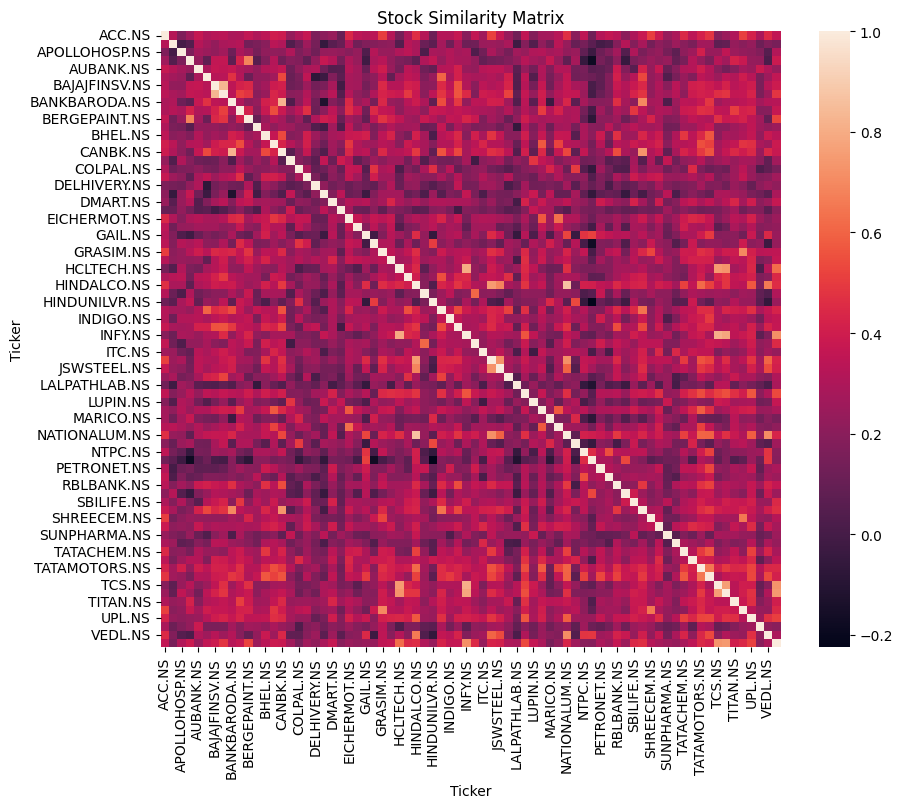

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of stock similarities
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df)
plt.title('Stock Similarity Matrix')
plt.show()
